# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [6]:
env = gym.make('BipedalWalker-v2')
# env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=0)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [7]:
print(env.observation_space.shape, env.observation_space.dtype, env.action_space.shape, env.action_space.dtype, 
      env.reward_range)

(24,) float32 (4,) float32 (-inf, inf)


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [10]:
# agent.actor_local.load_state_dict(torch.load('bipedal_checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('bipedal_checkpoint_critic.pth'))
total_reward_deque = deque(maxlen=100)
episode_total_rewards = []
for ep in range(1111):
    state = env.reset()
    agent.reset()
    total_reward = 0
    while True:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break 
    total_reward_deque.append(total_reward)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(total_reward_deque)))   
    #if np.mean(total_reward_deque) <= -130:
    episode_total_rewards.append([ep, np.mean(total_reward_deque)])
    if np.mean(total_reward_deque) >= 300:
        torch.save(agent.actor_local.state_dict(), 'bipedal_checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'bipedal_checkpoint_critic.pth')
        break

Episode 0	Average Score: -116.49
Episode 1	Average Score: -117.27
Episode 2	Average Score: -119.42
Episode 3	Average Score: -113.42
Episode 4	Average Score: -112.77
Episode 5	Average Score: -110.44
Episode 6	Average Score: -108.88
Episode 7	Average Score: -111.70
Episode 8	Average Score: -110.22
Episode 9	Average Score: -108.90
Episode 10	Average Score: -107.85
Episode 11	Average Score: -106.89
Episode 12	Average Score: -105.94
Episode 13	Average Score: -102.94
Episode 14	Average Score: -102.54
Episode 15	Average Score: -102.20
Episode 16	Average Score: -101.88
Episode 17	Average Score: -101.62
Episode 18	Average Score: -101.38
Episode 19	Average Score: -101.16
Episode 20	Average Score: -100.97
Episode 21	Average Score: -100.79
Episode 22	Average Score: -100.63
Episode 23	Average Score: -100.46
Episode 24	Average Score: -100.33
Episode 25	Average Score: -100.20
Episode 26	Average Score: -100.07
Episode 27	Average Score: -99.96
Episode 28	Average Score: -99.86
Episode 29	Average Score: 

Episode 239	Average Score: -118.05
Episode 240	Average Score: -118.24
Episode 241	Average Score: -118.46
Episode 242	Average Score: -118.67
Episode 243	Average Score: -118.88
Episode 244	Average Score: -119.08
Episode 245	Average Score: -119.28
Episode 246	Average Score: -119.49
Episode 247	Average Score: -119.68
Episode 248	Average Score: -119.86
Episode 249	Average Score: -120.02
Episode 250	Average Score: -119.94
Episode 251	Average Score: -119.86
Episode 252	Average Score: -119.80
Episode 253	Average Score: -119.72
Episode 254	Average Score: -119.64
Episode 255	Average Score: -119.60
Episode 256	Average Score: -119.56
Episode 257	Average Score: -119.53
Episode 258	Average Score: -119.49
Episode 259	Average Score: -119.45
Episode 260	Average Score: -119.42
Episode 261	Average Score: -119.37
Episode 262	Average Score: -119.33
Episode 263	Average Score: -119.28
Episode 264	Average Score: -119.24
Episode 265	Average Score: -119.20
Episode 266	Average Score: -119.16
Episode 267	Average 

Episode 474	Average Score: -117.12
Episode 475	Average Score: -117.08
Episode 476	Average Score: -116.94
Episode 477	Average Score: -116.73
Episode 478	Average Score: -116.52
Episode 479	Average Score: -116.41
Episode 480	Average Score: -116.23
Episode 481	Average Score: -116.13
Episode 482	Average Score: -115.99
Episode 483	Average Score: -115.85
Episode 484	Average Score: -115.83
Episode 485	Average Score: -115.79
Episode 486	Average Score: -115.71
Episode 487	Average Score: -115.64
Episode 488	Average Score: -115.38
Episode 489	Average Score: -114.97
Episode 490	Average Score: -114.42
Episode 491	Average Score: -113.91
Episode 492	Average Score: -113.38
Episode 493	Average Score: -112.85
Episode 494	Average Score: -112.24
Episode 495	Average Score: -111.68
Episode 496	Average Score: -111.09
Episode 497	Average Score: -110.51
Episode 498	Average Score: -109.95
Episode 499	Average Score: -109.38
Episode 500	Average Score: -109.09
Episode 501	Average Score: -108.93
Episode 502	Average 

Episode 713	Average Score: -86.28
Episode 714	Average Score: -85.97
Episode 715	Average Score: -85.62
Episode 716	Average Score: -85.51
Episode 717	Average Score: -86.09
Episode 718	Average Score: -86.60
Episode 719	Average Score: -87.11
Episode 720	Average Score: -87.02
Episode 721	Average Score: -86.58
Episode 722	Average Score: -86.50
Episode 723	Average Score: -86.15
Episode 724	Average Score: -86.05
Episode 725	Average Score: -85.66
Episode 726	Average Score: -85.40
Episode 727	Average Score: -83.78
Episode 728	Average Score: -83.33
Episode 729	Average Score: -83.02
Episode 730	Average Score: -82.34
Episode 731	Average Score: -81.82
Episode 732	Average Score: -81.05
Episode 733	Average Score: -80.43
Episode 734	Average Score: -79.84
Episode 735	Average Score: -79.22
Episode 736	Average Score: -78.56
Episode 737	Average Score: -78.01
Episode 738	Average Score: -77.81
Episode 739	Average Score: -77.13
Episode 740	Average Score: -76.64
Episode 741	Average Score: -76.17
Episode 742	Av

Episode 954	Average Score: -47.95
Episode 955	Average Score: -47.92
Episode 956	Average Score: -48.02
Episode 957	Average Score: -48.07
Episode 958	Average Score: -48.00
Episode 959	Average Score: -48.00
Episode 960	Average Score: -48.00
Episode 961	Average Score: -47.78
Episode 962	Average Score: -47.55
Episode 963	Average Score: -47.41
Episode 964	Average Score: -47.36
Episode 965	Average Score: -47.38
Episode 966	Average Score: -47.36
Episode 967	Average Score: -47.02
Episode 968	Average Score: -46.87
Episode 969	Average Score: -46.87
Episode 970	Average Score: -46.72
Episode 971	Average Score: -46.55
Episode 972	Average Score: -45.90
Episode 973	Average Score: -45.66
Episode 974	Average Score: -45.10
Episode 975	Average Score: -45.10
Episode 976	Average Score: -44.78
Episode 977	Average Score: -44.21
Episode 978	Average Score: -43.65
Episode 979	Average Score: -43.05
Episode 980	Average Score: -42.54
Episode 981	Average Score: -41.95
Episode 982	Average Score: -41.44
Episode 983	Av

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

In [12]:
eps, arr = np.array(episode_total_rewards).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

NameError: name 'episode_total_rewards' is not defined

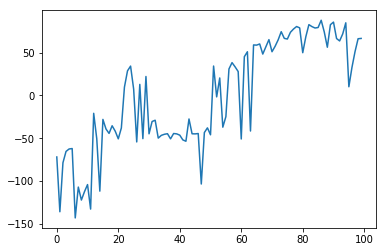

In [14]:
plt.plot(total_reward_deque)

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [9]:
# agent.actor_local.load_state_dict(torch.load('bipedal_checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('bipedal_checkpoint_critic.pth'))
# # 1 episode
# state = env.reset()
# agent.reset()
# total_reward = 0
# while True:
#     env.render()
#     action = agent.act(state)
#     state, reward, done, _ = env.step(action)
#     total_reward += reward
#     if done:
#         break
        
# print('total_reward:{}'.format(total_reward))
# env.close()

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  